In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
data = pd.read_csv("/content/drive/MyDrive/DE/ML/Datasets/AIML/titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
data.shape

(889, 11)

In [24]:
data.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


<Axes: ylabel='Age'>

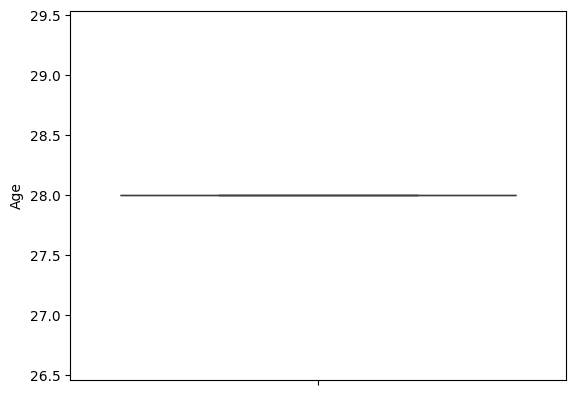

In [17]:
sns.boxplot(data['Age'])

In [27]:
data = data.drop('Cabin', axis = 1)
data['Age'] = data['Age'].fillna(data['Age']).mean()
data = data.dropna()

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['Embarked'] = le.fit_transform(data['Embarked'])

In [32]:
x = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = data['Survived']

In [48]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 14)

In [49]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtrain, ytrain)

LogisticRegression()

In [50]:
ypred = model.predict(xtest)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Accuracy score: ", accuracy_score(ypred, ytest))
print("Confusion Matrix: \n", confusion_matrix(ypred, ytest))
print("Classification Report: \n", classification_report(ypred, ytest))

Accuracy score:  0.797752808988764
Confusion Matrix: 
 [[142  31]
 [ 23  71]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.82      0.84       173
           1       0.70      0.76      0.72        94

    accuracy                           0.80       267
   macro avg       0.78      0.79      0.78       267
weighted avg       0.80      0.80      0.80       267



In [51]:
data['Survived'].value_counts()

,count
Survived,
0,549
1,340


In [52]:
import pickle

with open('model.pkl', 'wb') as f:
  pickle.dump(model, f)

In [ ]:
with open('model.pkl', 'rb') as f:
  loaded_model = pickle.load(f)

In [ ]:
# For large datasets
import joblib
joblib.dump(model, 'model.pkl')

In [ ]:
loaded_model = joblib.load('model.pkl')